In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.datasets import fetch_openml 
from sklearn.utils import shuffle 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from seaborn import heatmap

In [2]:
mnist = fetch_openml("mnist_784") 

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
type(mnist.data)

pandas.core.frame.DataFrame

In [5]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
categorical = mnist.data.dtypes == 'category'

In [7]:
categorical

pixel1      False
pixel2      False
pixel3      False
pixel4      False
pixel5      False
            ...  
pixel780    False
pixel781    False
pixel782    False
pixel783    False
pixel784    False
Length: 784, dtype: bool

In [8]:
mnist.data.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object

In [9]:
np.any(np.isnan(mnist.data), axis=0)

pixel1      False
pixel2      False
pixel3      False
pixel4      False
pixel5      False
            ...  
pixel780    False
pixel781    False
pixel782    False
pixel783    False
pixel784    False
Length: 784, dtype: bool

In [10]:
mnist.data.isnull()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
mnist.data.dropna()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1.1 (Logistic Regression) 

# train test split

In [12]:
X_train, y_train = mnist.data[:600], mnist.target[:600] 
X_test, y_test = mnist.data[60000:], mnist.target[60000:] 

In [13]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_train.shape, y_train.shape

((600, 784), (600,))

# Proper preprocessing. 

In [15]:
cat_preprocessing = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='NA'),
    OneHotEncoder(handle_unknown='ignore'))

cont_preprocessing = make_pipeline(
    SimpleImputer(),
    StandardScaler())

preprocess = make_column_transformer(
    (cat_preprocessing, make_column_selector(dtype_include='object')),
    remainder=cont_preprocessing)

In [16]:
cross_val_score(
    make_pipeline(preprocess, LinearRegression()),
    X_train, y_train, cv=3)

array([ -1.44379402,  -0.68715292, -90.42647306])

In [17]:
scores = cross_val_score(
    make_pipeline(preprocess, LinearRegression()),
    X_train, y_train, cv=3)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-30.85 accuracy with a standard deviation of 42.13


# Evaluate LogisticRegression using cross-validation with the default parameters. 


In [18]:
logreg = make_pipeline(SimpleImputer(strategy='median'),
                       StandardScaler(), LogisticRegression())

scores = cross_val_score(logreg, X_train, y_train, cv=10)
np.mean(scores)

C:\Users\tamim\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tamim\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

0.8666666666666666

# tune the parameters of the models using GridSearchCV.


In [19]:
clf = LogisticRegression()

In [20]:
clf.fit(X_train, y_train)

C:\Users\tamim\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
clf.score(X_train, y_train)

1.0

In [22]:
param_grid = {
    'C':np.logspace(-3,3,7)
          }

In [23]:
grid = GridSearchCV(
    estimator = clf, 
    param_grid = param_grid,
    cv = 10,
    return_train_score=True) 

In [24]:
grid.fit(X_train, y_train) 
grid.score(X_train, y_train)

C:\Users\tamim\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tamim\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

1.0

In [25]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.85
Best parameters:  {'C': 0.001}


# # Visualize the dependence of the validation score on the parameter 

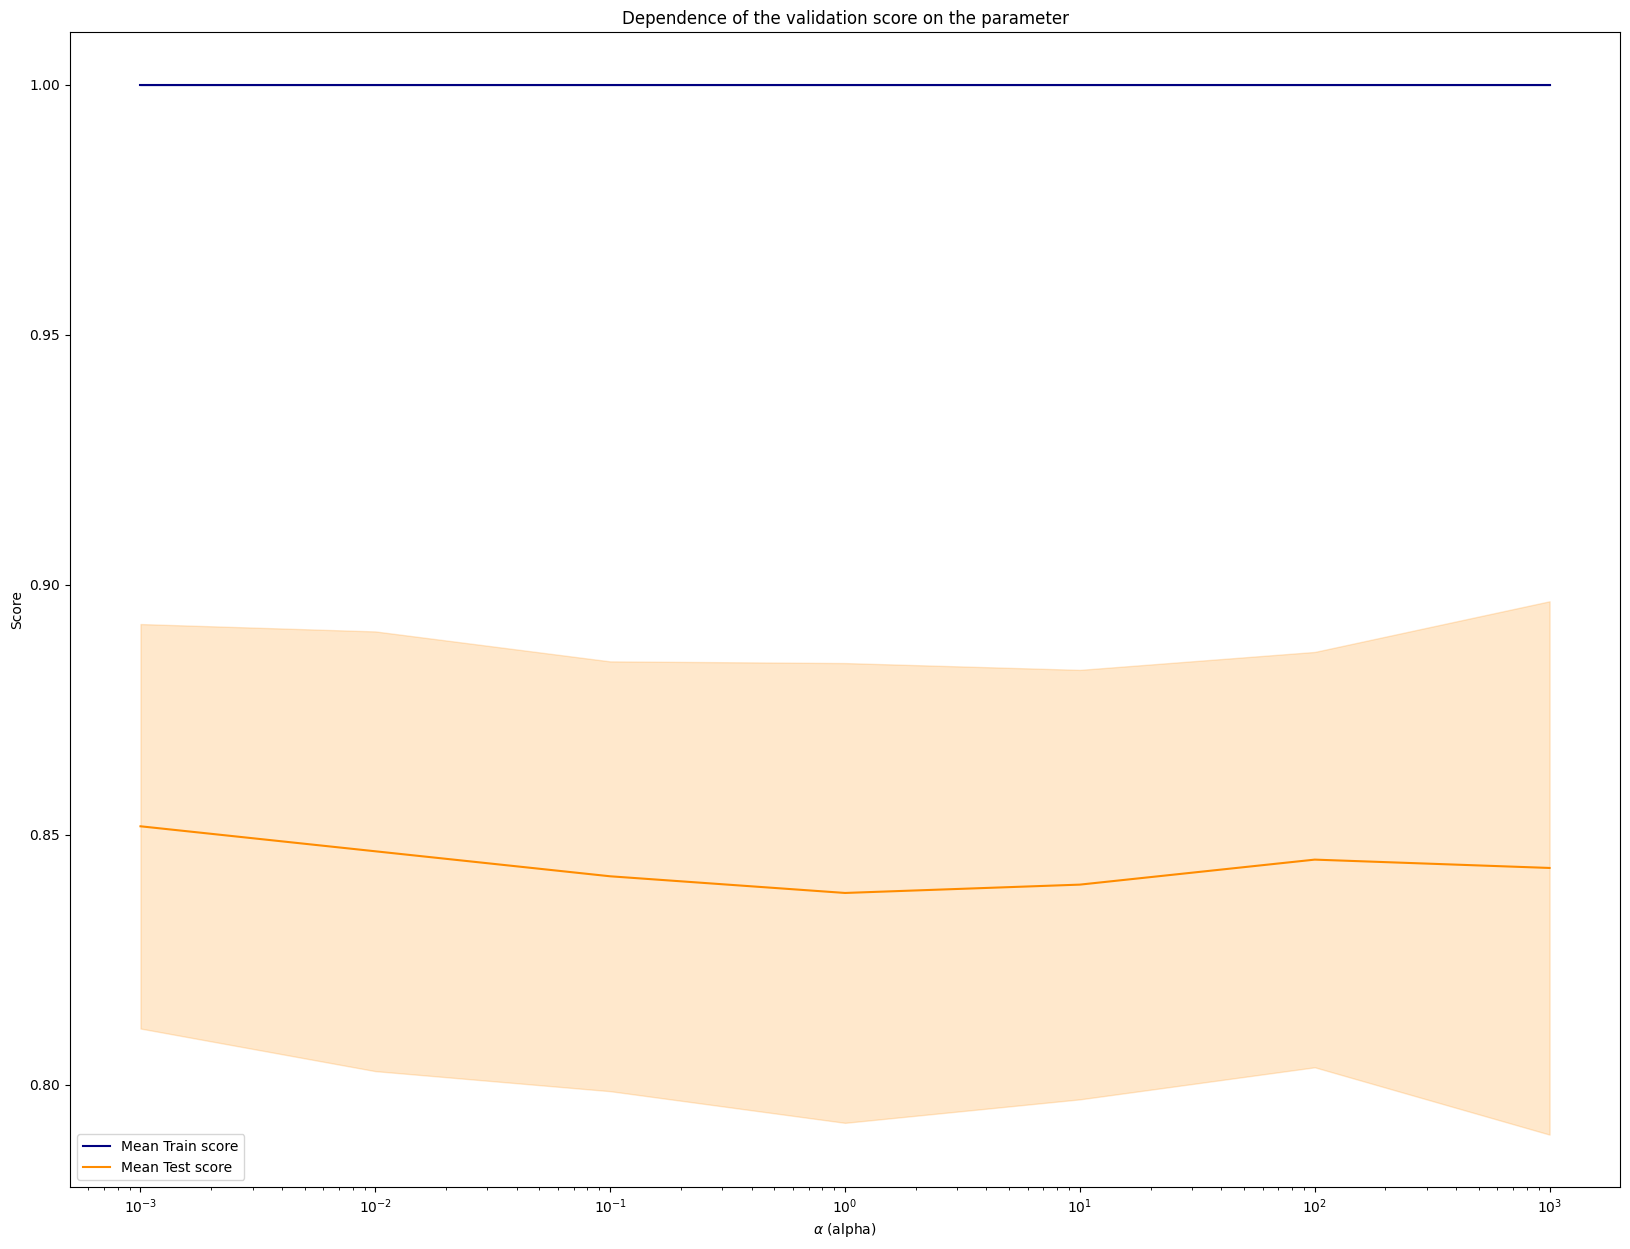

In [26]:
alphas = np.logspace(-3, 3, 7)

train_scores_mean = grid.cv_results_["mean_train_score"]
train_scores_std = grid.cv_results_["std_train_score"]
test_scores_mean = grid.cv_results_["mean_test_score"]
test_scores_std = grid.cv_results_["std_test_score"]

plt.figure(figsize = (20, 15))
plt.title('Dependence of the validation score on the parameter')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')


# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

# What is the performance of the best model on the test set? 

In [27]:
grid.best_estimator_ 

LogisticRegression(C=0.001)

# Compare the probability predictions on the misclassified class and the true class 

In [28]:
# make class predictions for the testing set
y_pred_class = clf.predict(X_test)

In [29]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8391


In [30]:
# Confusion matrix
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 926    0    7    4    5   16    9    9    3    1]
 [   0 1103    3    1    1    2    5    4   14    2]
 [  15   19  883   19   16    2   14   20   41    3]
 [   8    2   30  829    1   78    4   20   19   19]
 [   2    3   15    7  806    1   30    3    4  111]
 [  15    5   14   27   36  658   21   36   61   19]
 [  22    6   28    0   11   51  828    0   11    1]
 [   6   15   33   17    9    1    1  891    8   47]
 [  16   28   16   20   13   57   29   24  707   64]
 [  18    4   11   20   50   21    7  102   16  760]]


In [31]:
# print the true and predicted responses
print('True', y_test.values)
print('Pred', y_pred_class)

True ['7', '2', '1', '0', '4', ..., '2', '3', '4', '5', '6']
Length: 10000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
Pred ['7' '2' '1' ... '4' '5' '6']


In [32]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 926    0    7    4    5   16    9    9    3    1]
 [   0 1103    3    1    1    2    5    4   14    2]
 [  15   19  883   19   16    2   14   20   41    3]
 [   8    2   30  829    1   78    4   20   19   19]
 [   2    3   15    7  806    1   30    3    4  111]
 [  15    5   14   27   36  658   21   36   61   19]
 [  22    6   28    0   11   51  828    0   11    1]
 [   6   15   33   17    9    1    1  891    8   47]
 [  16   28   16   20   13   57   29   24  707   64]
 [  18    4   11   20   50   21    7  102   16  760]]


In [33]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

1.0
0.8391


In [34]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0
0.16090000000000004


In [35]:
 clf.predict_proba(X_test)

array([[4.67358696e-12, 2.78719479e-24, 1.32686283e-12, ...,
        9.99999999e-01, 5.97213275e-15, 9.01710844e-12],
       [1.09223873e-08, 1.02757447e-15, 9.86101344e-01, ...,
        5.32602144e-23, 2.10883130e-11, 5.15793053e-13],
       [6.17087643e-15, 9.99999956e-01, 3.48177138e-08, ...,
        2.48526399e-10, 5.54710749e-09, 1.16723430e-09],
       ...,
       [2.36092959e-13, 1.42475308e-13, 3.99706612e-14, ...,
        4.44381661e-09, 1.02625440e-05, 1.08419400e-03],
       [1.70527880e-06, 6.53742506e-11, 3.23008314e-14, ...,
        4.49748956e-06, 5.81520518e-03, 1.17504809e-08],
       [4.18346793e-12, 4.00153520e-25, 7.73509194e-12, ...,
        5.96492143e-24, 5.43511746e-19, 1.90616363e-26]])

# 1.2 (SVM) 

# Used the same train test split. 
# Used proper preprocessing.

In [36]:
# Cross validation with SVM 

from sklearn.svm import SVC
svc = SVC()

cross_val_score(
    make_pipeline(preprocess, SVC()),
    X_train, y_train, cv=3)

array([0.825, 0.825, 0.715])

In [37]:
score = cross_val_score(
    make_pipeline(preprocess, SVC()),
    X_train, y_train, cv=3)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.87 accuracy with a standard deviation of 0.04


# Evaluate SVM using cross-validation with the default parameters.


In [38]:
svmm = make_pipeline(SimpleImputer(strategy='median'),
                       StandardScaler(), SVC())

scores = cross_val_score(svmm, X_train, y_train, cv=10)
np.mean(scores)

0.8200000000000001

# tune the parameters of the models using GridSearchCV.


In [39]:
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.9833333333333333

In [40]:
param_grid = {
    'svc__C': np.logspace(-3, 2, 6),
    'svc__gamma': np.logspace(-3, 2, 6) / X_train.shape[0]
             }

In [41]:
grid= GridSearchCV(
    estimator = svmm, 
    param_grid = param_grid,
    cv = 3,
    return_train_score=True) 

In [42]:
grid.fit(X_train, y_train) 
grid.score(X_train, y_train)

0.985

In [43]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.82
Best parameters:  {'svc__C': 100.0, 'svc__gamma': 1.6666666666666667e-05}


In [45]:
grid.score(X_test, y_test)

0.8395

In [48]:
results = pd.DataFrame(grid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svc__C', 'param_svc__gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [50]:
plot_data = results.pivot('param_svc__C', 'param_svc__gamma','mean_test_score')
plot_data

C:\Users\tamim\AppData\Local\Temp\ipykernel_3140\357399189.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = results.pivot('param_svc__C', 'param_svc__gamma','mean_test_score')
C:\Users\tamim\AppData\Local\Temp\ipykernel_3140\357399189.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  plot_data = results.pivot('param_svc__C', 'param_svc__gamma','mean_test_score')


param_svc__gamma,0.000002,0.000017,0.000167,0.001667,0.016667,0.166667
param_svc__C,,,,,,
0.001,0.131667,0.131667,0.131667,0.131667,0.131667,0.131667
0.010,0.131667,0.131667,0.131667,0.131667,0.131667,0.131667
0.100,0.131667,0.131667,0.131667,0.315000,0.131667,0.131667
1.000,0.131667,0.131667,0.693333,0.790000,0.333333,0.131667
10.000,0.131667,0.726667,0.806667,0.801667,0.373333,0.131667
100.000,0.746667,0.818333,0.806667,0.801667,0.373333,0.131667


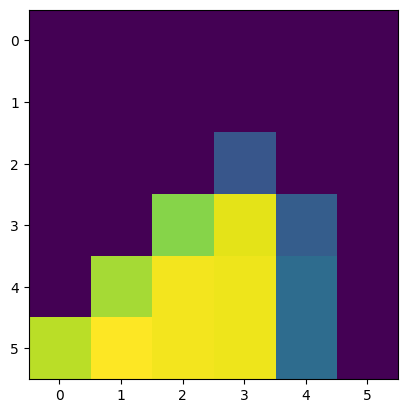

In [51]:
plt.imshow(plot_data)

<AxesSubplot: xlabel='param_svc__gamma', ylabel='param_svc__C'>

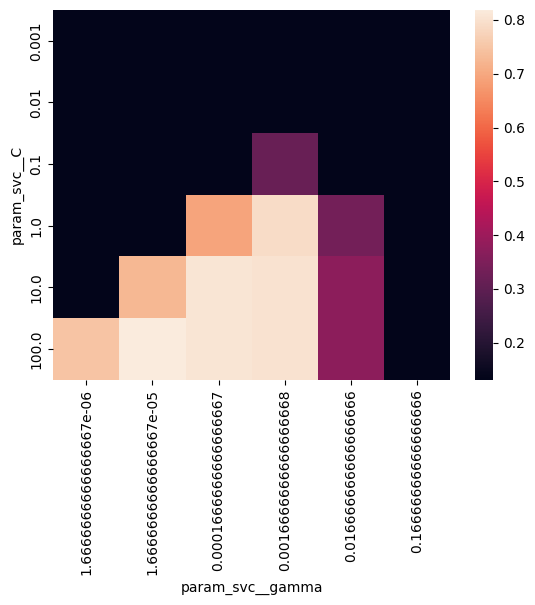

In [54]:
heatmap(plot_data)

# 1.3 Tree models
# Use the same train test split.
# Use proper preprocessing.
# Evaluate RandomForestClassifier using cross-validation with the default parameters.

In [55]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifer = RandomForestClassifier()

In [56]:
Rndm = make_pipeline(SimpleImputer(strategy='median'),
                       StandardScaler(), RandomForestClassifier())

scores = cross_val_score(Rndm, X_train, y_train, cv=10)
np.mean(scores)

0.8616666666666667

In [57]:
Rndm.fit(X_train, y_train)
Rndm.score(X_train, y_train)

1.0

In [58]:
# make class predictions for the testing set
y_pred_class = Rndm.predict(X_test)
y_pred_class

array(['7', '2', '1', ..., '9', '5', '6'], dtype=object)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [60]:
print('MAE: ', mean_absolute_error(y_test, y_pred_class ))
print('MSE: ', mean_squared_error(y_test, y_pred_class))
print('Accuracy: ', accuracy_score(y_test, y_pred_class))
print('classification_report: ', classification_report(y_test, y_pred_class))

MAE:  0.5031
MSE:  2.3207
Accuracy:  0.8571
classification_report:                precision    recall  f1-score   support

           0       0.90      0.97      0.93       980
           1       0.91      0.98      0.94      1135
           2       0.87      0.87      0.87      1032
           3       0.86      0.82      0.84      1010
           4       0.82      0.84      0.83       982
           5       0.79      0.73      0.76       892
           6       0.89      0.86      0.87       958
           7       0.89      0.87      0.88      1028
           8       0.89      0.75      0.82       974
           9       0.75      0.84      0.79      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.86      0.86     10000



In [61]:
tree = DecisionTreeClassifier(max_leaf_nodes=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

# What is the performance of the best model on the test set? 

In [62]:
tree.score(X_train, y_train)

0.6333333333333333

# Can you get the probability prediction like logistic regression?

In [63]:
 tree.predict_proba(X_test)

array([[0.        , 0.04301075, 0.10752688, ..., 0.55913978, 0.02150538,
        0.06451613],
       [0.70512821, 0.01282051, 0.02564103, ..., 0.        , 0.01282051,
        0.01282051],
       [0.        , 0.82758621, 0.09195402, ..., 0.02298851, 0.02298851,
        0.        ],
       ...,
       [0.01694915, 0.        , 0.01694915, ..., 0.01694915, 0.        ,
        0.03389831],
       [0.        , 0.        , 0.        , ..., 0.        , 0.2       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.2       ,
        0.        ]])

# The Answer is Yes